In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [14]:
prices_1_0 = pd.read_csv("round-2-island-data-bottle/round2/prices_round_2_day_-1.csv", delimiter=';')
prices_1_1 = pd.read_csv("round-2-island-data-bottle/round2/prices_round_2_day_0.csv", delimiter=';')
prices_1_1['timestamp'] += 1000000
prices_1_2 = pd.read_csv("round-2-island-data-bottle/round2/prices_round_2_day_1.csv", delimiter=';')
prices_1_2['timestamp'] += 2000000

prices = pd.concat([prices_1_0, prices_1_1, prices_1_2])


In [15]:
prices.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0


In [16]:
last_year_prices_1_0 = pd.read_csv("last_year_data/prices_round_3_day_0.csv", delimiter=';')
last_year_prices_1_0['timestamp'] += 1000000
last_year_prices_1_1 = pd.read_csv("last_year_data/prices_round_3_day_1.csv", delimiter=';')
last_year_prices_1_1['timestamp'] += 2000000
# last_year_prices_1_2 = pd.read_csv("last_year_data/prices_round_3_day_2.csv", delimiter=';')

last_year_prices = pd.concat([last_year_prices_1_0, last_year_prices_1_1])

last_year_prices.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,1000000,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,1000000,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,1000000,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,1000000,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,1000100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0


In [17]:
# strawberrys = last_year_prices[last_year_prices['product']=='STRAWBERRIES']
# chocolate = last_year_prices[last_year_prices['product']=='CHOCOLATE']
# roses = last_year_prices[last_year_prices['product']=='ROSES']

crossaint_prices = prices[prices['product'] == 'CROISSANTS']
jam_prices = prices[prices['product'] == 'JAMS']
djembe_prices = prices[prices['product'] == 'DJEMBES']


def simple_mid_price(row):
    bid = row[3]
    ask = row[9]
    return (bid+ask) / 2

crossaint_mid_price         = np.array(crossaint_prices.apply(simple_mid_price, axis=1))
jam_prices_mid_price        = np.array(jam_prices.apply(simple_mid_price, axis=1))
djembe_prices_mid_price     = np.array(djembe_prices.apply(simple_mid_price, axis=1))


C:\Users\chris\AppData\Local\Temp\ipykernel_31568\1761946994.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bid = row[3]
C:\Users\chris\AppData\Local\Temp\ipykernel_31568\1761946994.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ask = row[9]


In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

In [21]:
def get_row_by_timestamp(df, timestamp):
    # Ensure the 'timestamp' column is the index if it's not already
    if df.index.name != 'timestamp':
        df = df.set_index('timestamp')
    
    # Lookup the row by timestamp
    try:
        row = df.loc[timestamp]
        return row
    except KeyError:
        # Return None or appropriate error message if timestamp is not found
        return None

In [22]:
crossaint_prices = prices[prices['product'] == 'CROISSANTS']
jam_prices = prices[prices['product'] == 'JAMS']
djembe_prices = prices[prices['product'] == 'DJEMBES']

basket_1_prices = prices[prices['product'] == 'PICNIC_BASKET1']
basket_2_prices = prices[prices['product'] == 'PICNIC_BASKET2']


def get_mid_price(row):
    bids = row[3:9]
    asks = row[9:15]

    bid_1 = bids[0]
    bid_2 = bids[2]
    bid_3 = bids[4]

    ask_1 = asks[0]
    ask_2 = asks[2]
    ask_3 = asks[4]

    mid_bid = bid_3
    if np.isnan(mid_bid):
        mid_bid = bid_2
    if np.isnan(mid_bid):
        mid_bid = bid_1

    mid_ask = ask_3
    if np.isnan(mid_ask):
        mid_ask = ask_2
    if np.isnan(mid_ask):
        mid_ask = ask_1

    return (mid_bid+mid_ask)/2 

crossaint_mid_price         = np.array(crossaint_prices.apply(simple_mid_price, axis=1))
jam_prices_mid_price        = np.array(jam_prices.apply(simple_mid_price, axis=1))
djembe_prices_mid_price     = np.array(djembe_prices.apply(simple_mid_price, axis=1))
basket_1_prices_mid_price   = np.array(basket_1_prices.apply(simple_mid_price, axis=1))
basket_2_prices_mid_price   = np.array(basket_2_prices.apply(simple_mid_price, axis=1))

C:\Users\chris\AppData\Local\Temp\ipykernel_31568\1761946994.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bid = row[3]
C:\Users\chris\AppData\Local\Temp\ipykernel_31568\1761946994.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ask = row[9]


In [23]:
window_len = 50
std_multi = 1

basket_1_premium =  basket_1_prices_mid_price - 6 * crossaint_mid_price - 3 * jam_prices_mid_price - djembe_prices_mid_price
basket_2_premium = basket_2_prices_mid_price - 4 * crossaint_mid_price - 2 * jam_prices_mid_price

basket_1_df = pd.DataFrame(basket_1_prices_mid_price, columns=['mid_price'])
basket_1_df['premium'] = basket_1_premium
basket_1_df['timestamp'] = prices[prices['product'] == 'PICNIC_BASKET1']['timestamp'].values

basket_2_df = pd.DataFrame(basket_2_prices_mid_price, columns=['mid_price'])
basket_2_df['premium'] = basket_2_premium
basket_2_df['timestamp'] = prices[prices['product'] == 'PICNIC_BASKET2']['timestamp'].values

basket_1_df['mean'] = basket_1_df['premium'].rolling(window=window_len).mean()
basket_1_df['std'] = basket_1_df['premium'].rolling(window=window_len).std()
basket_2_df['mean'] = basket_2_df['premium'].rolling(window=window_len).mean()
basket_2_df['std'] = basket_2_df['premium'].rolling(window=window_len).std()

# drop rows with no values
basket_1_df = basket_1_df.dropna()
basket_2_df = basket_2_df.dropna()

# Calculate z-score for both baskets
basket_1_df['zscore'] = basket_1_df['premium'] - basket_1_df['mean']
basket_2_df['zscore'] = basket_2_df['premium'] - basket_2_df['mean']

# Buy signals (zscore < -2*std), Sell signals (zscore > 2*std)
basket_1_df['raw_signal'] = None
basket_1_df.loc[basket_1_df['zscore'] > std_multi * basket_1_df['std'], 'raw_signal'] = 'sell'
basket_1_df.loc[basket_1_df['zscore'] < -std_multi * basket_1_df['std'], 'raw_signal'] = 'buy'

basket_2_df['raw_signal'] = None
basket_2_df.loc[basket_2_df['zscore'] > std_multi * basket_2_df['std'], 'raw_signal'] = 'sell'
basket_2_df.loc[basket_2_df['zscore'] < -std_multi * basket_2_df['std'], 'raw_signal'] = 'buy'

# Drop NaNs and separate out buy/sell raw signals
basket_1_buy = basket_1_df[basket_1_df['raw_signal'] == 'buy']
basket_1_sell = basket_1_df[basket_1_df['raw_signal'] == 'sell']

basket_2_buy = basket_2_df[basket_2_df['raw_signal'] == 'buy']
basket_2_sell = basket_2_df[basket_2_df['raw_signal'] == 'sell']

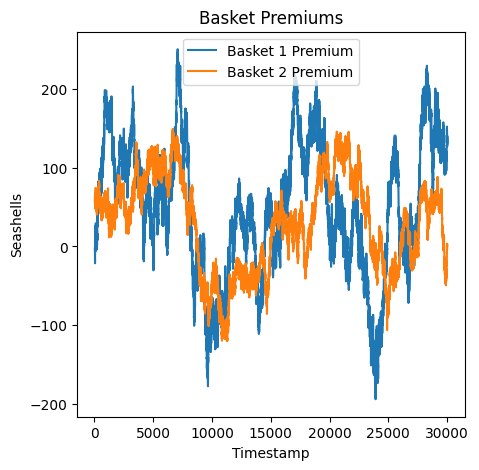

In [24]:
plt.figure(figsize=(5, 5))
plt.title("Basket Premiums")
plt.xlabel("Timestamp")
plt.ylabel("Seashells")
plt.plot(basket_1_df['premium'], label='Basket 1 Premium')
plt.plot(basket_2_df['premium'], label='Basket 2 Premium')
plt.legend()

In [ ]:
threshold = 20
window = 50

Series mean:  18.625755400487463
Series mean:  48.82898734599846


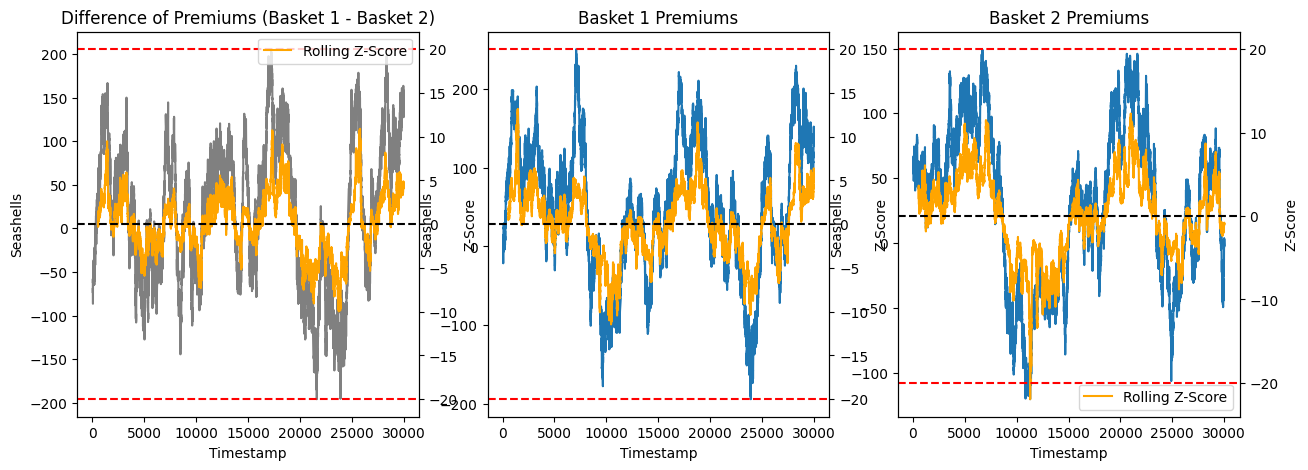

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)

plt.title("Difference of Premiums (Basket 1 - Basket 2)")
plt.xlabel("Timestamp")
plt.ylabel("Seashells")

series = basket_1_df['premium'] - basket_2_df['premium']
mean = series.mean()
std = series.std()
print("Series mean: ", mean)


window_len = window
rolling_std = series.rolling(window=window_len).std()
rolling_zscore = (series - mean) / rolling_std

plt.plot(series, c='grey')
# plt.axhline(mean, color='red', linestyle='--', label='Mean')
plt.twinx()
plt.plot(rolling_zscore, label='Rolling Z-Score', color='orange', alpha=1.0)
plt.legend()

plt.axhline(threshold, color='red', linestyle='--')
plt.axhline(-threshold, color='red', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel("Z-Score")

plt.subplot(1, 3, 2)
plt.title("Basket 1 Premiums")
plt.xlabel("Timestamp")
plt.ylabel("Seashells")

series = basket_1_df['premium']
mean = series.mean()
print("Series mean: ", mean)

rolling_std = series.rolling(window=window_len).std()
rolling_zscore = (series - mean) / rolling_std
plt.plot(basket_1_df['premium'], label='Basket 2 Premium')

plt.twinx()
plt.plot(rolling_zscore, label='Rolling Z-Score', color='orange', alpha=1.0)

plt.axhline(20, color='red', linestyle='--')
plt.axhline(-20, color='red', linestyle='--')
plt.axhline(0, color='black', linestyle='--')

plt.ylabel("Z-Score")
plt.subplot(1, 3, 3)
plt.title("Basket 2 Premiums")
plt.xlabel("Timestamp")
plt.ylabel("Seashells")

series = basket_2_df['premium']
mean = series.mean()

rolling_std = series.rolling(window=window_len).std()
rolling_zscore = (series - mean) / rolling_std

plt.plot(basket_2_df['premium'], label='Basket 2 Premium')

plt.twinx()
plt.plot(rolling_zscore, label='Rolling Z-Score', color='orange', alpha=1.0)

plt.axhline(20, color='red', linestyle='--')
plt.axhline(-20, color='red', linestyle='--')
plt.axhline(0, color='black', linestyle='--')

plt.ylabel("Z-Score")

plt.legend()


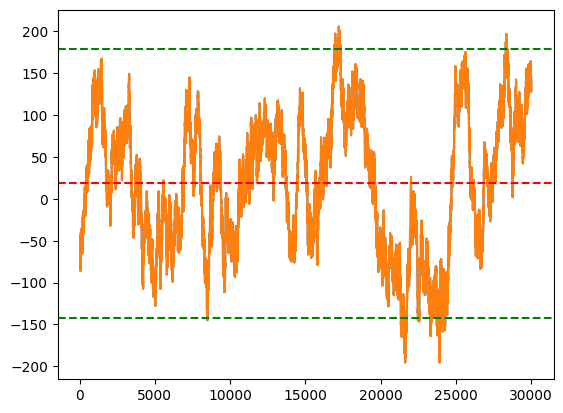

In [ ]:
#plt.plot(basket_1_df['premium'])
# plt.plot(basket_2_df['premium'])
plt.plot(basket_1_df['premium']-basket_2_df['premium'])

series = basket_1_df['premium']-basket_2_df['premium']
mean = series.mean()
std = series.std()
threshold = 2 * std

plt.plot(series)

plt.plot("Premium Difference Between Basket 1 and 2")
plt.axhline(mean, color='red', linestyle='--')
plt.axhline(mean + threshold, color='green', linestyle='--')
plt.axhline(mean - threshold, color='green', linestyle='--')

In [333]:
def backtest_signals(df):
    position = None
    entry_price = 0
    trades = []

    for i, row in df.iterrows():
        signal = row['raw_signal']
        premium = row['premium']
        timestamp = row['timestamp']

        if signal == 'buy':
            if position == 'short':
                # Close short, open long
                pnl = entry_price - premium
                trades.append({'entry': entry_ts, 'exit': timestamp, 'side': 'short', 'pnl': pnl})
                entry_price = premium
                entry_ts = timestamp
                position = 'long'
            elif position is None:
                # Open long
                entry_price = premium
                entry_ts = timestamp
                position = 'long'

        elif signal == 'sell':
            if position == 'long':
                # Close long, open short
                pnl = premium - entry_price
                trades.append({'entry': entry_ts, 'exit': timestamp, 'side': 'long', 'pnl': pnl})
                entry_price = premium
                entry_ts = timestamp
                position = 'short'
            elif position is None:
                # Open short
                entry_price = premium
                entry_ts = timestamp
                position = 'short'

    # Optional: close any open position at the end
    if position is not None:
        final_pnl = (premium - entry_price) if position == 'long' else (entry_price - premium)
        trades.append({'entry': entry_ts, 'exit': timestamp, 'side': position, 'pnl': final_pnl})

    return pd.DataFrame(trades)

In [334]:
basket_1_trades = backtest_signals(basket_1_df)
basket_2_trades = backtest_signals(basket_2_df)

# View trades and total PnL
print("Basket 1 total PnL:", basket_1_trades['pnl'].sum())
print("Basket 2 total PnL:", basket_2_trades['pnl'].sum())

Basket 1 total PnL: 292.0
Basket 2 total PnL: 445.0


In [335]:
import plotly.graph_objects as go

# Add cumulative PnL column
basket_1_trades['cumulative_pnl'] = basket_1_trades['pnl'].cumsum()

# Create the figure
fig = go.Figure()

# Cumulative PnL line
fig.add_trace(go.Scatter(
    x=basket_1_trades['exit'],
    y=basket_1_trades['cumulative_pnl'],
    mode='lines+markers',
    name='Cumulative PnL',
    line=dict(color='blue'),
    marker=dict(size=6)
))

# Add trade direction annotations (optional)
for _, row in basket_1_trades.iterrows():
    fig.add_annotation(
        x=row['exit'],
        y=row['cumulative_pnl'],
        text=row['side'],
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-30 if row['side'] == 'long' else 30,
        font=dict(color='green' if row['side'] == 'long' else 'red'),
        arrowcolor='green' if row['side'] == 'long' else 'red'
    )

# Formatting
fig.update_layout(
    title='Basket 1 Cumulative PnL',
    xaxis_title='Timestamp',
    yaxis_title='PnL',
    template='plotly_white',
    height=500
)

fig.show()